# Comparing Means and Statistical Power 

## Hypothesis Testing 
Suppose that your company has decided to implement a new marketing campaign and needs help from you, their data scientist, to analyze it. They randomly select 10 stores to be guinea pigs for the new program. After one month they analyze revenues of the randomly selected 10 stores, and 


|With new  Revenue      |Non Guniea Pigs|
|-------------------------|---------------|
|105120                   |118359         |
|146040                   |145671         |
|138007                   |139346         |
|126980                   |118954         |
|125035                   |106195         |
|129597                   |121035         |
|118342                   |109041         |
|123197                   |106912         |
|155286                   |131905         |
|106036                   |139614         |
|143256                   |102364         |
|154879                   |116590         |

You could do a quick calculation on these ten to see if the , but in statistics it is acknowledged that some variation can happen randomly, not due to real differences. This is especially true when the sample size is only 10 workers out of hundreds for each company. To be certain about your choice, you must perform statistical analysis. 

To start, you formulate your __hypotheses__. These are mutually exclusive, falsifiable statements. Only one can be true, and one of them will be true. We create these two hypotheses: 

- The _null_ hypothesis $H_o$: The true means of the the sample populations do not differ.
- The _alternate_ hypothesis $H_a$: The true means of the sample populations do differ.

### 4 Steps of Hypothesis Testing

All hypotheses are tested using a four-step process:

1. State the two hypotheses so that only one can be right. 
2. Formulate an analysis plan, which outlines how the data will be evaluated.
3. Carry out the plan and physically analyze the sample data.
4. Analyze the results and either reject the null hypothesis, or state that the null hypothesis is plausible, given the data.

Hypothesis testing can be done mentally. It would be burdensome to have to state your _null_ and _alternate_ hypotheses, and run through these four steps explicitly every time you made a predictive computer model. The point is that in means testing, there is a clear process and result that deliniates "Yes, the true means of these samples are different" and "No, they're not significantly different"

In the case of us determining which company offers a higher average starting salary, these are our hypotheses: 

- $H_o$: The comapny's average starting salary is the same. 
- $H_a$: The company's average starting salary is different. 

We will evaluate these hypotheses using statistical techniques that offer us an informed decision. 


## T-Tests and Z-Tests

The __T-test__ is the test that compares two means of given sets of data, or one mean of a set of data and a hypothesized value, and tells how likely it was that the populations the samples came from have the same means. The T-test is used when sample sizes are low.  The __Z-test__ is used when sample size is large and the population standard deviation is known. Both tests us how significant the differences are, and whether those differences could have occurred by chance. It can also be used to compare the mean of a given sample to some hypothesized value. The equation for the $t$ value is:  


<h3 align="center">
    <font size="10">
        $ t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{S_1^2}{N_1}+\frac{S_2^2}{N_2}}}$
    </font>
    </h3> 
<h3 align="center">
    <font size="10">
        $ z = \frac{\bar{X} - \mu}{\sigma}$
    </font>
    </h3> 

Where the $\bar{X}$'s represent the means of the samples, $N$'s are the sample sizes of each sample, $S^2$ is the variance for each sample, $\sigma$ is the population standard deviation and the denominator term for the t-value is the Standard Error of the samples. To compare a sample's mean to a hypothesized value(i.e. we wanted to know if Company A payed higher than $\mu =  120k$ per year), replace $\bar{X_2}$ with the hypothesized $\mu$. 

__The $t$ value tells us how many standard deviations away from the mean our sample sits on a $t$ distribution of the _differences_ of these two means, where the mean of the distribution is zero.__
The t-distribution changes based on sample size, as increased sample size allows for higher _degrees of freedom_, which are defined for two samples as: 

- $df = (N_1 + N_2)  – 2$

And for a single sample as: 

- $df = N - 1$

### A Note on Probability Distributions

__Probability__ takes on a value from 0 to 1, with a probability of 0 for an event meaning that it would never occur in infinite samples, a probability of 0.5 means that in a sufficiently large number of trials, half of the trials would result in success, and a probability of 1 meaning that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. The t-distributions below are probability distributions for the difference in the means of two samples could take on, if the true population means were zero. Because the samples are randomly chosen, and are only a portion of the population size, their means could be different due to random variation even though they come from the same population. Imagine selecting the heights of 10 random men from the population. Each time you created this sample, the means would vary slightly due to randomness.

Probability distributions can be described by: 
- Their mean, $\mu$, which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean. 
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 

#### Normal Distribution 
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and economic phenomena. You will encounter it for most predictive models you create. It is one of the assumptions of many computational algorithms.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean.

All of the t-distributions below are normal distributions. As the degrees of freedom increases past 30 or so, the distribution becomes the _standard normal distribution_, which has a standard deviation of 1 and mean of 0, and we use z-scores to analyze this. 

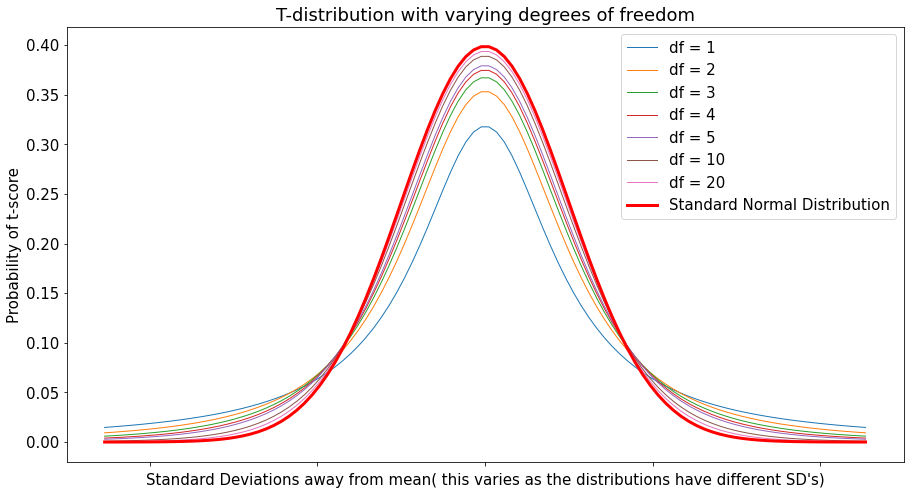

In [5]:
import numpy as np
import scipy.stats as stats
from scipy.stats import t
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
t_df = [1, 2, 3, 4, 5, 10, 20]
for df in t_df:
    x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 100)
    ax.plot(x, t.pdf(x, df), '-', lw=1, alpha=1, label='df = ' + str(df))
x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 100)
ax.plot(x, t.pdf(x, 1000), lw=3, alpha=1, color = 'r',  label='Standard Normal Distribution')
plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel("Standard Deviations away from mean( this varies as the distributions have different SD's)")
plt.title("T-distribution with varying degrees of freedom")
ax.set_xticklabels(labels = "")
plt.legend()

### T-distribution p-value

As we can see, a lower sample size, and hence a lower degrees of freedom, leads to a lower probaility that our t-score is near 0 when our population means are the same, because more random variation is likely when the sample size is so low. The point of a t-score is to determine if the difference in the two means of the samples is too drastic for the true population means to be the same. As we approacch 30 with our degrees of freedom, the graph doesnt change much, and this is a standard normal distribution, which the z-score uses. That is why we use z-score for large sample sizes. 

Once we get our t-score based on the t-distribution, shown on the x-axis of the above graph, we get a corresponding __p-value__, shown on the y-axis. This value is the probability of our gotten t-value if the true means were the same. 

- If the corresponding p-value from our t-value is too low, we choose to __reject the null hypothesis $H_o$__, and say that our samples come from different populations who's means are different. This is a "statistically significant" result. 


- If the p-value is sufficiently high, we __fail to reject the null hypothesis $H_o$__, and say that there is a high enough chance that the samples came from populations with the same means. This is a "statistically insignificant" result. 


- The value at which a non-significant result becomes a significant one is called the __*critical value*__, denoted $\alpha$, and is most commonly 0.05. For a two-tailed t-test, where we want to know if one sample is either significantly higher or lower than the other, we will choose to reject $H_o$ if our t-value falls within the outer 2.5% of our distribution(.025*2 = .05), which would result in a p-value of less thanm .05 for a two-tailed t-test. 

Let's return to our example of company starting salary to see if we can make an educated inference about whether or not one company actually has a higher starting salary than the other. 

In [96]:
import pandas as pd

# create dataframe to store randomly collected salary data
salary_data = pd.DataFrame()
a = salary_data["Company A"] = [
    100, 146, 138, 126, 125, 129, 110, 123, 155, 106
]
b = salary_data["Company B"] = [
    118, 145, 139, 118, 106, 121, 109, 106, 131, 139
]
salary_data

,Company A,Company B
0,100,118
1,146,145
2,138,139
3,126,118
4,125,106
5,129,121
6,110,109
7,123,106
8,155,131
9,106,139


In [109]:
stats.ttest_ind(a, b, alternative="two-sided")

Ttest_indResult(statistic=0.3627632315144104, pvalue=0.7210064645656653)

Our test gave us results of $t = 0.363$ and $p = 0.721$. 


This tells us: 
- This result was only 0.363 standard deviations from the mean of the t-distribution, which is very close. 
- There is a 0.721 probability that this result would occur if the true difference between the sample means was zero. This is very high and means that we fail to reject our null hypothesis that the mean salary of the two companies is probably the same or close to it. 


# ANOVA 